In [6]:
# Student Performance Analysis - Data Science Workflow

#This notebook analyzes student performance using the `student-mat.csv` dataset.

## 1. Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:

## 2. Explore & Clean Data

### Check for missing values



In [20]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:

### Remove duplicates



In [21]:
df_before = df.shape[0]    # Only the number of rows
df.drop_duplicates(inplace=True)
df_after = df.shape[0]
print(f"Removed {df_before - df_after} duplicate rows.")


Removed 0 duplicate rows.


In [ ]:

### Inspect dataset shape & data types



In [22]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (395, 33)


In [23]:
print("Data types:\n", df.dtypes)

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [17]:

## 3. Analysis Questions

### 1. Average final grade (G3)



In [24]:
avg_g3 = df['G3'].mean()
print(f"Average Final Grade (G3): {avg_g3:.2f}")

Average Final Grade (G3): 10.42


In [25]:

### 2. Students scoring above 15



In [26]:
above_15 = df[df['G3'] > 15].shape
print(f"Number of students scored above 15: {above_15}")

Number of students scored above 15: (40, 33)


In [27]:

### 3. Study time correlation with performance



In [28]:
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade (G3): {correlation:.2f}")

Correlation between study time and final grade (G3): 0.10


In [29]:

### 4. Performance comparison by gender



In [30]:
male_avg = df[df['sex']=='M']['G3'].mean()
female_avg = df[df['sex']=='F']['G3'].mean()
print(f"Male average score: {male_avg:.2f}")
print(f"Female average score: {female_avg:.2f}")

Male average score: 10.91
Female average score: 9.97


In [31]:

## 4. Visualizations

### Histogram of Grades



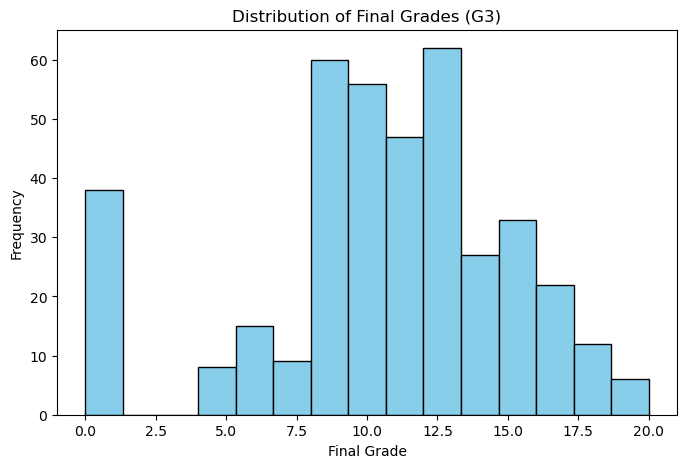

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

In [33]:

### Scatterplot: Study Time vs Grades



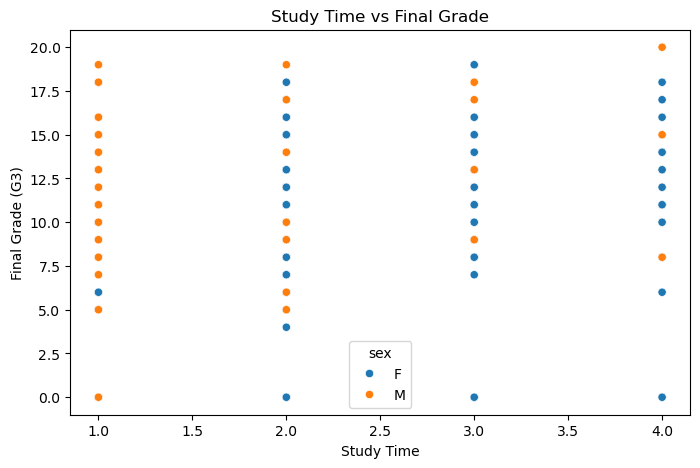

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='studytime', y='G3', data=df, hue='sex')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

In [35]:

### Bar Chart: Male vs Female Average Score



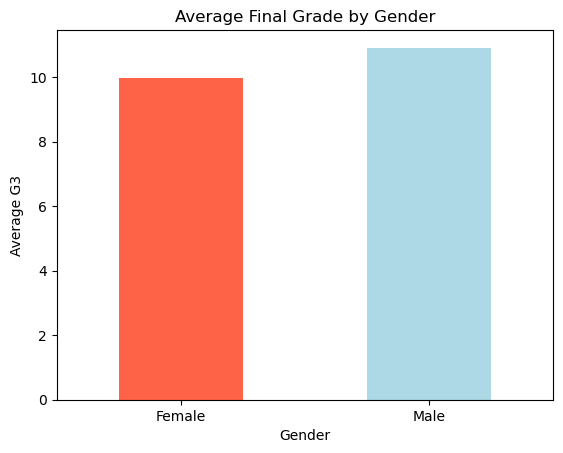

In [38]:
gender_averages = df.groupby('sex')['G3'].mean()
gender_averages.plot(kind='bar', color=['tomato', 'lightblue'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation=0)
plt.show()